In [2]:
# Dependencies and Setup 

import pandas as pd 
# import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st 


In [3]:
# Store filepaths into variable 
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Merge the dataframes base on the common column "Mouse ID"
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
combined_df = combined_df.sort_values(by='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
combined_df.columns 

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [7]:
# Display the number of unique mice ID
# mouse_metadata['Mouse ID'].nunique()
# mouse_metadata
unique_mouseID = combined_df['Mouse ID'].nunique()
unique_mouseID

249

In [8]:
#  Check for any mouse ID with duplicate time points
duplicate_timePoints = combined_df.loc[combined_df.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_timePoints
# duplicate_timePoints = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
# duplicate_timePoints = duplicate_timePoints.sort_values(by='Tumor Volume (mm3)', ascending=True)
# duplicate_timePoints 

array(['g989'], dtype=object)

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# combined_df_clean = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
combined_clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_timePoints)==False]

combined_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mouse_ids = combined_clean_df['Mouse ID'].nunique()
print("Number of unique Mouse IDs:", num_mouse_ids)

Number of unique Mouse IDs: 248


In [11]:
print("\033[1;32m Summary Statistics\033[0m")

 Summary Statistics


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## First group the data by the unique values in the 'Drug Regimen' column
grouped_data = combined_clean_df.groupby('Drug Regimen')

# Calculate the summary statistics
drug_regimen_table_by_volume = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Alternatively, you can calculate each statistic separately
mean = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Rename the columns
drug_regimen_table_by_volume.columns = ['Mean Tumore Volume', 'Median Tumore Volume', 'Tumore Volume Variance', 'Tumore Volume Std. Dev.', 'Tumore Volume Std. Err.']


drug_regimen_table_by_volume

,Mean Tumore Volume,Median Tumore Volume,Tumore Volume Variance,Tumore Volume Std. Dev.,Tumore Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## First group the data by the unique values in the 'Drug Regimen' column
grouped_data = combined_clean_df.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for the 'Tumor Volume (mm3)' column
drug_regimen_table_by_volume = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', lambda x: np.std(x) / np.sqrt(len(x))])

# Rename the columns
drug_regimen_table_by_volume.columns = ['Mean Tumore Volume', 'Median Tumore Volume', 'Tumore Volume Variance', 'Tumore Volume Std. Dev.', 'Tumore Volume Std. Err.']

# Print the table
drug_regimen_table_by_volume


,Mean Tumore Volume,Median Tumore Volume,Tumore Volume Variance,Tumore Volume Std. Dev.,Tumore Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


Text(0.5, 1.0, 'Number of Rows per Drug Regimen')

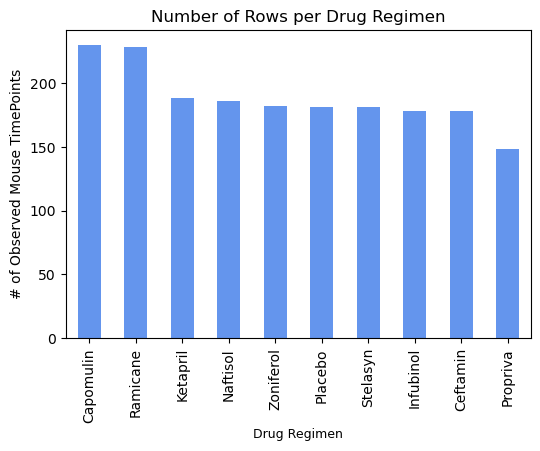

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd 
# Extracting the drug regimen and counting the number of rows for each regimen
drug_counts = combined_clean_df['Drug Regimen'].value_counts()

# Plotting the bar chart with aesthetic improvements
ax = drug_counts.plot(kind='bar', color='cornflowerblue', figsize=(6, 4))

# Adding labels and title with customized font size
ax.set_xlabel('Drug Regimen', fontsize=9)
ax.set_ylabel('# of Observed Mouse TimePoints', fontsize=10)
ax.set_title('Number of Rows per Drug Regimen', fontsize=12)



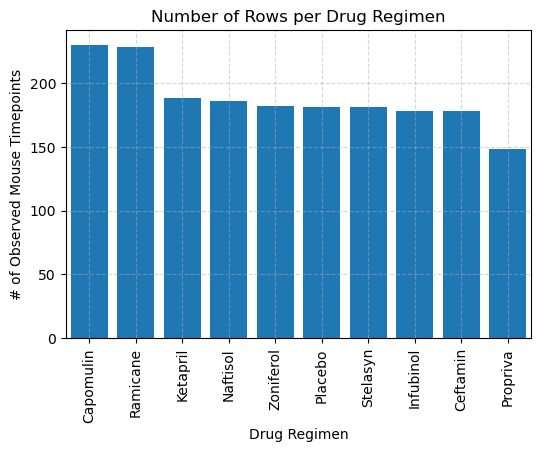

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows for each drug regimen
drug_counts = combined_clean_df['Drug Regimen'].value_counts()

# Plotting the bar chart with aesthetic improvements
plt.figure(figsize=(6, 4))

# Using a color palette and enabling grid lines
drug_counts.plot(kind='bar', color='royalblue')
plt.grid(True, linestyle='--', alpha=0.5)

# Extract the drug regimens and row counts
drug_regimens = drug_counts.index
row_counts = drug_counts.values

# Plot the bar chart
plt.bar(drug_regimens, row_counts)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Rows per Drug Regimen')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

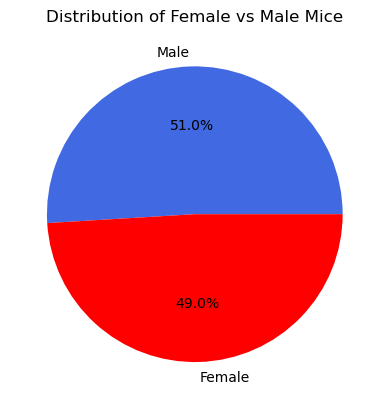

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd

# Calculate the count of female and male mice
gender_counts = combined_clean_df['Sex'].value_counts()

# Create a pie plot using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'red'])

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Remove the y-axis label
plt.ylabel('')

# Display the plot
plt.show()

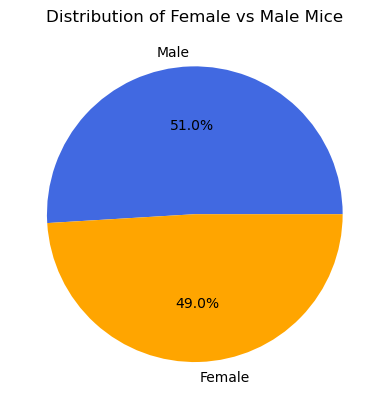

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' containing the relevant data
# Calculate the counts for each category
category_counts = combined_clean_df['Sex'].value_counts()

# Extract the values and labels from the DataFrame
values = category_counts.values
labels = category_counts.index

# Optionally, create a list of colors
colors = ['royalblue', 'orange']

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

In [18]:
print("\033[1;32m Quartiles, Outliers and Boxplots\033[0m")

 Quartiles, Outliers and Boxplots


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Group the DataFrame by ID and filter for the specific values in column B
grouped_df = combined_clean_df[combined_clean_df['Drug Regimen'].isin(specific_regimens)].groupby('Mouse ID')

# Calculate the total volume for each unique ID
total_volume = grouped_df['Tumor Volume (mm3)'].sum()

# Convert the series to a DataFrame
total_volume_df = pd.DataFrame(total_volume)

# Rename the column
total_volume_df.columns = ['Total Volume']

# Reset the index
total_volume_df.reset_index(inplace=True)

# Print the result
total_volume_df



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Total Volume
0,a203,563.127077
1,a251,552.370946
2,a275,527.709651
3,a411,407.013854
4,a444,430.600524
...,...,...
95,y769,562.908873
96,y793,385.068292
97,y865,549.985586
98,z578,384.115100


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Group the DataFrame by ID and filter for the specific values in column B
grouped_df = combined_clean_df[combined_clean_df['Drug Regimen'].isin(specific_regimens)].groupby('Mouse ID')

# Calculate the maximum value for column Z for each unique ID
max_TimePoint_value = grouped_df['Timepoint'].max()

# Convert the series to a DataFrame
max_TimePoint_value_df = pd.DataFrame(max_TimePoint_value)

# Rename the column
max_TimePoint_value_df.columns = ['max_TimePoint_value']

# Reset the index
max_TimePoint_value_df.reset_index(inplace=True)
max_TimePoint_value_df

,Mouse ID,max_TimePoint_value
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [22]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = total_volume_df.merge(max_TimePoint_value_df, on = 'Mouse ID')
merge_df


,Mouse ID,Total Volume,max_TimePoint_value
0,a203,563.127077,45
1,a251,552.370946,45
2,a275,527.709651,45
3,a411,407.013854,45
4,a444,430.600524,45
...,...,...,...
95,y769,562.908873,45
96,y793,385.068292,45
97,y865,549.985586,45
98,z578,384.115100,45


In [25]:
treatments = merge_df['Drug Regimen'].unique().tolist()
treatments

KeyError: 'Drug Regimen'

In [24]:
# Create an empty list to store tumor volume data
tumor_vol_data = []

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = [x for x in data if x < lower_boundary or x > upper_boundary]

# Print the IQR, lower boundary, upper boundary, and potential outliers
print("IQR:", IQR)
print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)
print("Potential Outliers:", outliers)